<a href="https://www.kaggle.com/code/waitongchung/smallhit-browsedata?scriptVersionId=118237809" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

This BLASTNet Tutorial is written by Wai Tong Chung. More info visit https://blastnet.github.io

This Python 3 environment comes with many helpful analytics libraries installed
It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python

Input data files are available in the read-only "../input/" directory
For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 

You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Citations

Please cite the following when publishing based on this dataset:

1. Appl. Energy in Combust. Sci. Paper: https://doi.org/10.1016/j.jaecs.2022.100087
2. ICML W. Paper: https://openreview.net/forum?id=LxGTZM7L6qn
3. Dataset citation: https://doi.org/10.5281/zenodo.7242864


# Import libs and set data path

In [1]:
import numpy as np # linear algebra
import json
import os
import matplotlib.pyplot as plt

data_path = '/kaggle/input/'+os.popen('ls '+'/kaggle/input/').read().split('\n')[0]+'/'
print("Data path: ",data_path)

Data path:  /kaggle/input/inert-ch4o2-hit-dns/


# Metadata

We first obtain info on this BLASTNet dataset by reading info.json.

In [2]:
f = open(data_path + '/info.json')
metadata = json.load(f) #returns a dict

The metadata is comprised of the global metadata, which provides info on the dataset as a whole:

In [3]:
for key in metadata['global']:
    print(key," : ",metadata['global'][key])

dataset_id  :  waitongchung/inert-ch4o2-hit-dns
Nxyz  :  [129, 129, 129]
snapshots  :  98
variables  :  ['UX_ms-1', 'UY_ms-1', 'UZ_ms-1', 'P_Pa', 'T_K', 'RHO_kgm-3', 'YO2', 'YCH4']
compression  :  None
grid  :  {'x': './grid/X_m.dat', 'y': './grid/Y_m.dat', 'z': './grid/Z_m.dat'}
bc  :  Periodic in x-, y-, and z-directions.
ic  :  {'U': 'HIT Von Karman Pao with Re_t = 80 and integral lengthscale of 62.5E-6m', 'T [K]': 300, 'P [Pa]': 101325, 'Mixture': 'CH4-O2 inert branch from 1D cantera counterflow calculations.'}
doi  :  https://doi.org/10.1016/j.combustflame.2021.111758
contributors  :  Wai Tong Chung and Matthias Ihme
description  :  Compressible Inert CH4-O2 Homogeneous Isotropic Turbulence DNS
chem_thermo_tran  :  {'cantera_xml': './chem_thermo_tran/bfer.xml'}


And the local metadata which provides info on the individual snapshots. Here, we print some local metadata.

In [4]:
if len(metadata['local'])>3:
    for file_id in range(3):
        for key in metadata['local'][file_id]:
            print(key," : ",metadata['local'][file_id][key])
        print("----------------------------------")
else:
    file_id = 0
    for key in metadata['local'][file_id]:
        print(key," : ",metadata['local'][file_id][key])



id  :  0
time [s]  :  3.08296e-07
UX_ms-1 filename  :  ./data/UX_ms-1_id000.dat
UY_ms-1 filename  :  ./data/UY_ms-1_id000.dat
UZ_ms-1 filename  :  ./data/UZ_ms-1_id000.dat
P_Pa filename  :  ./data/P_Pa_id000.dat
T_K filename  :  ./data/T_K_id000.dat
RHO_kgm-3 filename  :  ./data/RHO_kgm-3_id000.dat
YO2 filename  :  ./data/YO2_id000.dat
YCH4 filename  :  ./data/YCH4_id000.dat
----------------------------------
id  :  1
time [s]  :  6.23745e-07
UX_ms-1 filename  :  ./data/UX_ms-1_id001.dat
UY_ms-1 filename  :  ./data/UY_ms-1_id001.dat
UZ_ms-1 filename  :  ./data/UZ_ms-1_id001.dat
P_Pa filename  :  ./data/P_Pa_id001.dat
T_K filename  :  ./data/T_K_id001.dat
RHO_kgm-3 filename  :  ./data/RHO_kgm-3_id001.dat
YO2 filename  :  ./data/YO2_id001.dat
YCH4 filename  :  ./data/YCH4_id001.dat
----------------------------------
id  :  2
time [s]  :  9.43542e-07
UX_ms-1 filename  :  ./data/UX_ms-1_id002.dat
UY_ms-1 filename  :  ./data/UY_ms-1_id002.dat
UZ_ms-1 filename  :  ./data/UZ_ms-1_id002.dat
P_

# Grid Information

Since we're dealing with spatial data let's look at the spatial grid. We first get some details from the metadata.

In [5]:
Nx,Ny,Nz = metadata['global']['Nxyz']

X_filename = metadata['global']['grid']['x']
Y_filename = metadata['global']['grid']['y']
Z_filename = metadata['global']['grid']['z']

print(X_filename)
print(Y_filename)
print(Z_filename)

./grid/X_m.dat
./grid/Y_m.dat
./grid/Z_m.dat


Now lets load the 3D grid data and obtain their 1D profiles

In [6]:
#load data
X =  np.fromfile(data_path+X_filename,dtype='<f4')
Y =  np.fromfile(data_path+Y_filename,dtype='<f4')
Z =  np.fromfile(data_path+Z_filename,dtype='<f4')

#get 1d profile
x1d = np.unique(X)
y1d = np.unique(Y)
z1d = np.unique(Z)

We can use this to plot the dimensions of the grid in 1D.

Text(0.5, 0, 'Index k')

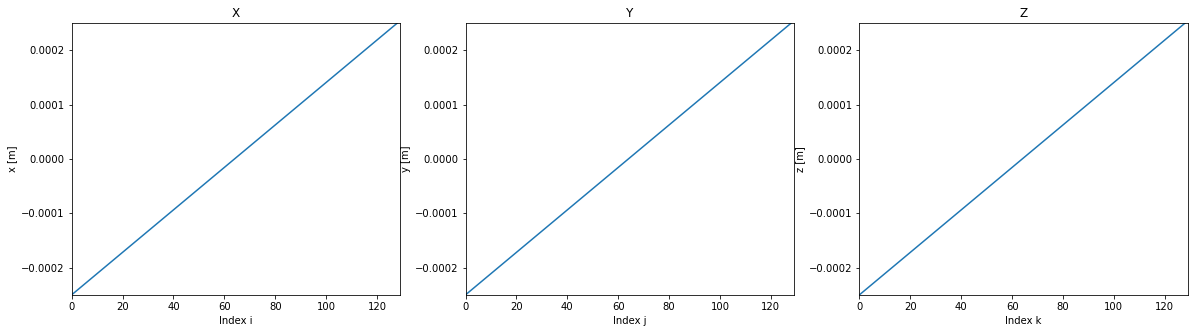

In [7]:
fig, axs = plt.subplots(1,3,figsize=(20, 5))
axs[0].plot(x1d)
axs[0].set_xlim([0,len(x1d)])
axs[0].set_ylim([x1d.min(),x1d.max()])
axs[0].set_title('X')
axs[0].set_ylabel('x [m]')
axs[0].set_xlabel('Index i')


axs[1].plot(y1d)
axs[1].set_xlim([0,len(y1d)])
axs[1].set_ylim([y1d.min(),y1d.max()])
axs[1].set_title('Y')
axs[1].set_ylabel('y [m]')
axs[1].set_xlabel('Index j')

axs[2].plot(z1d)
axs[2].set_xlim([0,len(z1d)])
axs[2].set_ylim([z1d.min(),z1d.max()])
axs[2].set_title('Z')
axs[2].set_ylabel('z [m]')
axs[2].set_xlabel('Index k')


# Visualizing a single flowfield

We now visualizing the a random velocity flowfields using imshow. Here load the file with metadata info with a random number generator.

In [8]:
#Random number generator
nfile = len(metadata['local'])
file_id = np.random.randint(nfile)

#Load and reshape array
u_filename = metadata['local'][file_id]['UX_ms-1 filename']
u = np.fromfile(data_path+u_filename,dtype='<f4')
u = u.reshape(Nx,Ny,Nz)

print("Array shape: ")
print(u.shape)

Array shape: 
(129, 129, 129)


Next we plot files in the x-,y-, and z- planes. Note that the arrays are in ijk order.

File Id = 12
t = 4.21298e-06 s


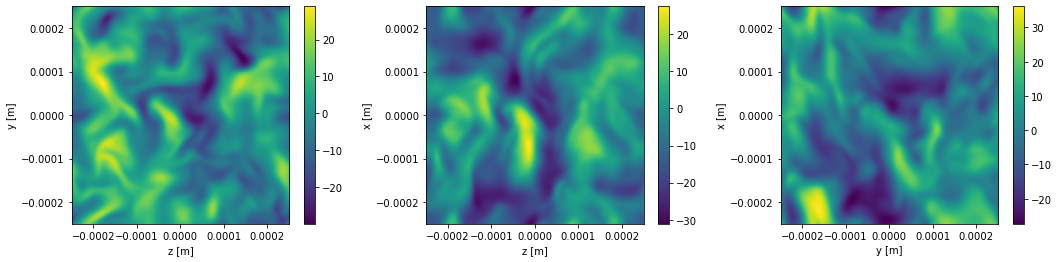

In [9]:
fig, axs = plt.subplots(1,3,figsize=(18, 4))

imX = axs[0].imshow(u[int(len(x1d)/2),:,:],origin='lower',extent = [y1d.min(), y1d.max(),z1d.min(),z1d.max()])
axs[0].set_ylabel('y [m]')
axs[0].set_xlabel('z [m]')

imY = axs[1].imshow(u[:,int(len(y1d)/2),:],origin='lower',extent = [x1d.min(), x1d.max(),z1d.min(),z1d.max()])
axs[1].set_ylabel('x [m]')
axs[1].set_xlabel('z [m]')

imZ = axs[2].imshow(u[:,:,int(len(z1d)/2)],origin='lower',extent = [x1d.min(), x1d.max(),y1d.min(),y1d.max()])
axs[2].set_ylabel('x [m]')
axs[2].set_xlabel('y [m]')

plt.colorbar(imX, ax=axs[0])
plt.colorbar(imY, ax=axs[1])
plt.colorbar(imZ, ax=axs[2])

# plt.colorbar()
print('File Id = '+str(metadata['local'][file_id]['id']))
print('t = '+str(metadata['local'][file_id]['time [s]'])+' s')

# Browse the dataset 

Now that we've visualized and loaded the data, we can now browse for more info on the data.

We start by printing the max and min of the flowfields we have:

In [10]:
#Random number generator
file_id = np.random.randint(nfile)
local_meta = metadata['local'][file_id]

#Print min max
for key in local_meta:
    if 'filename' in key:
        field = np.fromfile(data_path+local_meta[key],dtype='<f4').reshape(Nx,Ny,Nz)
        print(key.replace(' filename','') +"| Min: "+str(field.min())+"| Max: " + str(field.max()))

UX_ms-1| Min: -26.383684| Max: 26.747995
UY_ms-1| Min: -29.780975| Max: 29.1036
UZ_ms-1| Min: -28.333223| Max: 26.95433
P_Pa| Min: 98488.95| Max: 105827.44
T_K| Min: 295.7151| Max: 303.48914
RHO_kgm-3| Min: 0.63862115| Max: 1.2139231
YO2| Min: 2.9473567e-05| Max: 0.9181956
YCH4| Min: 0.08180437| Max: 0.99997056


Now let's visualize what the flowfields look like from start and finish:

Plotting 8 variables in 2rows
File Id = 0
t=3.08296e-07 s


Text(0.5, 0.04, 'y [m]')

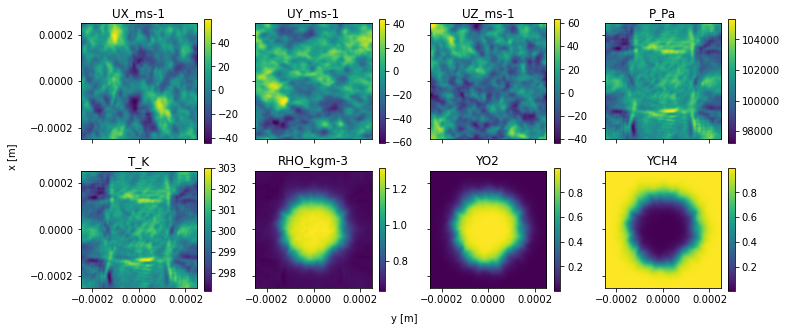

In [11]:
#Input params
file_id = 0 
nrows = 2
figsize = (12, 5)

#Get Number of variables
nvar = len(metadata['global']['variables'])
print("Plotting "+str(nvar)+" variables in " + str(nrows) + "rows")

#Print file info:
local_meta = metadata['local'][file_id]
print('File Id = '+str(metadata['local'][file_id]['id']))
print('t='+str(metadata['local'][file_id]['time [s]'])+' s')


#Plot all scalars
nplots = [nrows,int(nvar/nrows)]    
fig, axs = plt.subplots(nplots[0],nplots[1],figsize=figsize,sharex=True,sharey=True)
count= 0
for key in local_meta:
    if 'filename' in key:
        field = np.fromfile(data_path+local_meta[key],dtype='<f4').reshape(Nx,Ny,Nz)
        if nplots[0]>1:
            i = int(count/nplots[1])
            j = count - i*nplots[1]
            im = axs[i,j].imshow(field[:,:,int(len(z1d)/2)],origin='lower',
                   extent = [x1d.min(), x1d.max(),y1d.min(),y1d.max()])
            plt.colorbar(im, ax=axs[i, j])
            axs[i,j].set_title(key.replace(' filename',''))
        else:
            axs[count].imshow(field[:,:,int(len(z1d)/2)],origin='lower',
               extent = [x1d.min(), x1d.max(),y1d.min(),y1d.max()])
            plt.colorbar(im, ax=axs[count])
            axs[count].set_title(key.replace(' filename',''))
        count=count+1
fig.text(0.04, 0.5, 'x [m]', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'y [m]', ha='center')


Plotting 8 variables in 2rows
File Id = 98
t=3.42327e-05 s


Text(0.5, 0.04, 'y [m]')

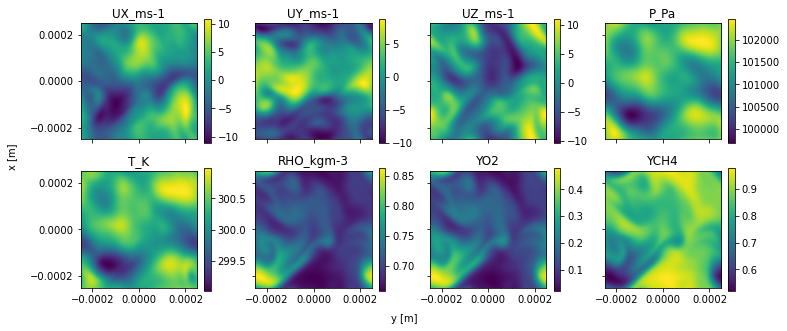

In [12]:
#Input params
file_id = nfile-1 
nrows = 2
figsize = (12, 5)

#Get Number of variables
nvar = len(metadata['global']['variables'])
print("Plotting "+str(nvar)+" variables in " + str(nrows) + "rows")

#Print file info:
local_meta = metadata['local'][file_id]
print('File Id = '+str(metadata['local'][file_id]['id']))
print('t='+str(metadata['local'][file_id]['time [s]'])+' s')


#Plot all scalars
nplots = [nrows,int(nvar/nrows)]    
fig, axs = plt.subplots(nplots[0],nplots[1],figsize=figsize,sharex=True,sharey=True)
count= 0
for key in local_meta:
    if 'filename' in key:
        field = np.fromfile(data_path+local_meta[key],dtype='<f4').reshape(Nx,Ny,Nz)
        if nplots[0]>1:
            i = int(count/nplots[1])
            j = count - i*nplots[1]
            im = axs[i,j].imshow(field[:,:,int(len(z1d)/2)],origin='lower',
                   extent = [x1d.min(), x1d.max(),y1d.min(),y1d.max()])
            plt.colorbar(im, ax=axs[i, j])
            axs[i,j].set_title(key.replace(' filename',''))
        else:
            axs[count].imshow(field[:,:,int(len(z1d)/2)],origin='lower',
               extent = [x1d.min(), x1d.max(),y1d.min(),y1d.max()])
            plt.colorbar(im, ax=axs[count])
            axs[count].set_title(key.replace(' filename',''))
        count=count+1
fig.text(0.04, 0.5, 'x [m]', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'y [m]', ha='center')
